In [ ]:
#|default_exp PCA

# PCA

> Some tests with PCA

In [ ]:
#|export
import pandas as pd
import numpy as np

In [ ]:
#|export
from sklearn.decomposition import PCA

In [ ]:
C = [1,4,2,2,4,2]
df = pd.DataFrame({'A':[1,2,3,4,5,6], 'B':[1,3,5,5,3,1], 'C1':C, 'C2':C})

In [ ]:
df

,A,B,C1,C2
0,1,1,1,1
1,2,3,4,4
2,3,5,2,2
3,4,5,2,2
4,5,3,4,4
5,6,1,2,2


In [ ]:
zero_mean = df - df.mean()
np.linalg.eig(zero_mean.cov())

(array([2.25783424, 4.13294994, 3.30921583, 0.        ]),
 array([[ 4.38595999e-01, -6.90751652e-01, -5.74887558e-01,
         -4.06759704e-18],
        [ 4.62601343e-01, -3.74906474e-01,  8.03396000e-01,
         -1.14581450e-16],
        [-5.44808933e-01, -4.37211213e-01,  1.09679448e-01,
         -7.07106781e-01],
        [-5.44808933e-01, -4.37211213e-01,  1.09679448e-01,
          7.07106781e-01]]))

In [ ]:
#not timed
pca = PCA(n_components=4)

In [ ]:
%%timeit
pca.fit(zero_mean)
pca.components_

2.61 ms ± 400 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%time
print(pca.explained_variance_, pca.singular_values_, sep='\n')

[4.13294994e+00 3.30921583e+00 2.25783424e+00 7.51030182e-33]
[4.54584972e+00 4.06768720e+00 3.35993619e+00 1.93782118e-16]
CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
np.matmul(zero_mean.corr(), pca.components_.T)/pca.singular_values_

,0,1,2,3
A,-0.193928,0.129562,-0.059770,-0.193283
B,-0.117592,-0.207353,-0.078473,-0.607407
C1,-0.240572,-0.059146,0.270675,-0.572923
C2,-0.240572,-0.059146,0.270675,-0.572923


In [ ]:
pd.DataFrame(pca.components_.T)

,0,1,2,3
0,-0.690752,0.574888,-0.438596,0.000000e+00
1,-0.374906,-0.803396,-0.462601,-1.110223e-16
2,-0.437211,-0.109679,0.544809,-7.071068e-01
3,-0.437211,-0.109679,0.544809,7.071068e-01


In [ ]:
i=0
#np.dot(np.matmul(zero_mean.corr(), np.transpose(pca.components_[i][:,np.newaxis])), pca.components_[i])/pca.explained_variance_[i]

In [ ]:
proj = []
for i in range(4):
    proj.append(np.outer(np.dot((df - np.mean(df,axis=0)).to_numpy(), pca.components_[i]),pca.components_[i][:,np.newaxis]))

In [ ]:
[np.linalg.norm(p) for p in proj]

[4.5458497197998735,
 4.067687196947729,
 3.3599361887962864,
 6.544668208791957e-16]

In [ ]:
trial_df = pd.concat([df,df,df,df,df,df,df,df], ignore_index=True)

In [ ]:
trial_df['B'].value_counts()

1    16
3    16
5    16
Name: B, dtype: int64

# Trials on LearningCurveDisplay

In [ ]:
#|export
import matplotlib.pyplot as plt
from sklearn.model_selection import LearningCurveDisplay, train_test_split
from sklearn.tree import DecisionTreeClassifier

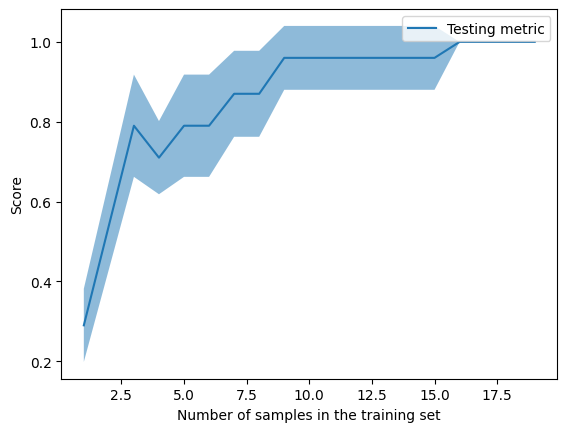

CPU times: total: 938 ms
Wall time: 1.27 s


In [ ]:
%%time
X_train, X_test, y_train, y_test = train_test_split(trial_df.drop(columns=['B']), trial_df['B'], test_size=0.5, random_state=42, stratify= trial_df['B'])
tree = DecisionTreeClassifier(random_state=42)
LearningCurveDisplay.from_estimator(tree, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 16))
plt.show()